In [ ]:
import numpy as np
import pandas as pd
import random

g = 9.81
rho = 1.225
Cd = 0.47
A = 0.0042
m = 0.145
k = 0.5 * rho * Cd * A

def calculating_accel(state, k, m, wind_speed, wind_angle):
    x, y, vx, vy = state
    wind_vx = wind_speed * np.cos(np.radians(wind_angle))
    wind_vy = wind_speed * np.sin(np.radians(wind_angle))
    v_rel_x = vx - wind_vx
    v_rel_y = vy - wind_vy
    v_rel = np.sqrt(v_rel_x**2 + v_rel_y**2)
    if v_rel == 0:
        return [vx, vy, 0, -g]
    F_air_x = -k * v_rel * v_rel_x
    F_air_y = -k * v_rel * v_rel_y
    ax = F_air_x / m
    ay = (F_air_y - m * g) / m
    return [vx, vy, ax, ay]

def runge_kutta_step(state, dt, k, m, wind_speed, wind_angle):
    k1 = calculating_accel(state, k, m, wind_speed, wind_angle)
    k2 = calculating_accel([s + 0.5 * dt * k1_i for s, k1_i in zip(state, k1)], k, m, wind_speed, wind_angle)
    k3 = calculating_accel([s + 0.5 * dt * k2_i for s, k2_i in zip(state, k2)], k, m, wind_speed, wind_angle)
    k4 = calculating_accel([s + dt * k3_i for s, k3_i in zip(state, k3)], k, m, wind_speed, wind_angle)
    return [s + dt / 6 * (k1_i + 2 * k2_i + 2 * k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)]

def projectile_motion_with_air_resistance(v0, theta, h0, k, m, wind_speed, wind_angle):
    theta = np.radians(theta)
    vx0 = v0 * np.cos(theta)
    vy0 = v0 * np.sin(theta)
    state = [0, h0, vx0, vy0]
    dt = 0.01
    times = [0]
    x_values = [0]
    y_values = [h0]
    while state[1] >= 0:
        state = runge_kutta_step(state, dt, k, m, wind_speed, wind_angle)
        times.append(times[-1] + dt)
        x_values.append(state[0])
        y_values.append(state[1])
        if len(times) > 5000:
            break
    time_of_flight = times[-1]
    return time_of_flight, x_values[-1], max(y_values)

data = []
for _ in range(1000):
    v0 = random.uniform(20, 60)
    angle = random.uniform(15, 75)
    wind_speed = random.uniform(0, 10)
    wind_angle = random.uniform(0, 360)
    time, rng, height = projectile_motion_with_air_resistance(v0, angle, 0, k, m, wind_speed, wind_angle)
    data.append([v0, angle, wind_speed, wind_angle, rng, height, time])

columns = ['Initial_Velocity', 'Launch_Angle', 'Wind_Speed', 'Wind_Angle', 'Range', 'Max_Height', 'Time_of_Flight']
df = pd.DataFrame(data, columns=columns)

df.to_csv('synthetic_projectile_data_with_wind2.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
import random

g = 9.81
rho = 1.225
Cd = 0.47
A = 0.0042
m = 0.145
k = 0.5 * rho * Cd * A

def calculating_accel(t, state, k, m):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    if v == 0:
        return [vx, vy, 0, -g]
    F_air_x = -k * v * vx  # Drag force in x direction
    F_air_y = -k * v * vy  # Drag force in y direction
    ax = F_air_x / m      # Acceleration in x direction
    ay = (F_air_y - m * g) / m # Acceleration in y direction
    return [vx, vy, ax, ay]

def runge_kutta_step(t, state, dt, k, m):
    k1 = calculating_accel(t, state, k, m)
    k2 = calculating_accel(t + 0.5 * dt, [s + 0.5 * dt * k1_i for s, k1_i in zip(state, k1)], k, m)
    k3 = calculating_accel(t + 0.5 * dt, [s + 0.5 * dt * k2_i for s, k2_i in zip(state, k2)], k, m)
    k4 = calculating_accel(t + dt, [s + dt * k3_i for s, k3_i in zip(state, k3)], k, m)

    # This line implements the Runge-Kutta 4th order method to update the state
    return [s + dt / 6 * (k1_i + 2 * k2_i + 2 * k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, k1, k2, k3, k4)]

def projectile_motion_with_air_resistance(v0, theta, h0, k, m):
    theta = np.radians(theta)
    vx0 = v0 * np.cos(theta) # Initial velocity in x direction
    vy0 = v0 * np.sin(theta) # Initial velocity in y direction
    state = [0, h0, vx0, vy0]
    dt = 0.01
    times = [0]
    x_values = [0]
    y_values = [h0]
    while state[1] >= 0:
        t = times[-1]
        state = runge_kutta_step(t, state, dt, k, m)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
        if len(times) > 5000:
            break
    time_of_flight = times[-1]
    return time_of_flight, x_values[-1], max(y_values)

data = []
for _ in range(1000):
    v0 = random.uniform(20, 60)
    angle = random.uniform(15, 75)
    wind_speed = random.uniform(0, 10)
    wind_angle = random.uniform(0, 360)
    time, rng, height = projectile_motion_with_air_resistance(v0, angle, 0, k, m)
    data.append([v0, angle, wind_speed, wind_angle, rng, height, time])

columns = ['Initial_Velocity', 'Launch_Angle', 'Wind_Speed', 'Wind_Angle', 'Range', 'Max_Height', 'Time_of_Flight']
df = pd.DataFrame(data, columns=columns)
df.to_csv('synthetic_projectile_data.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/synthetic_projectile_data (2).csv')

df_clean = df[df['Time_of_Flight'] > 0.1].copy()


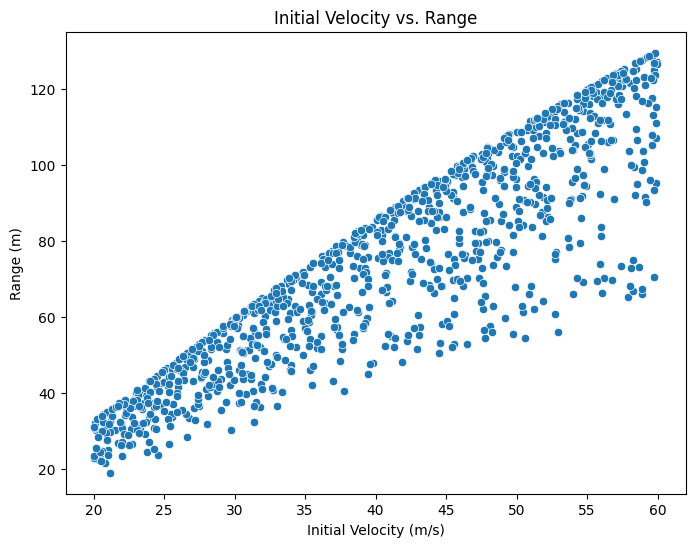

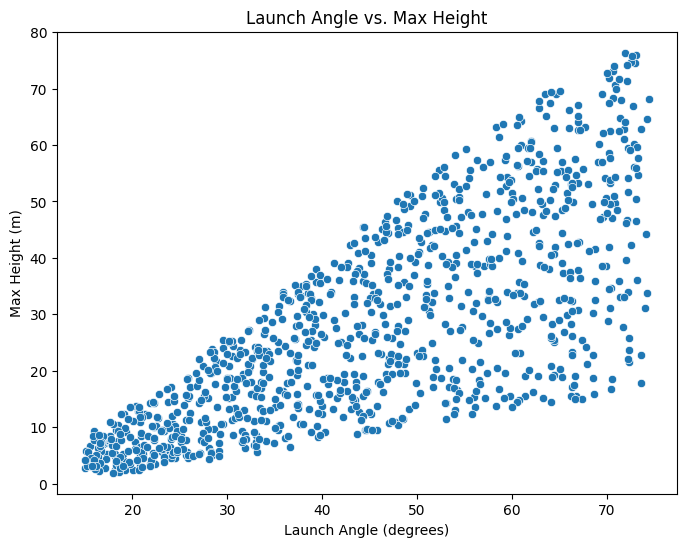

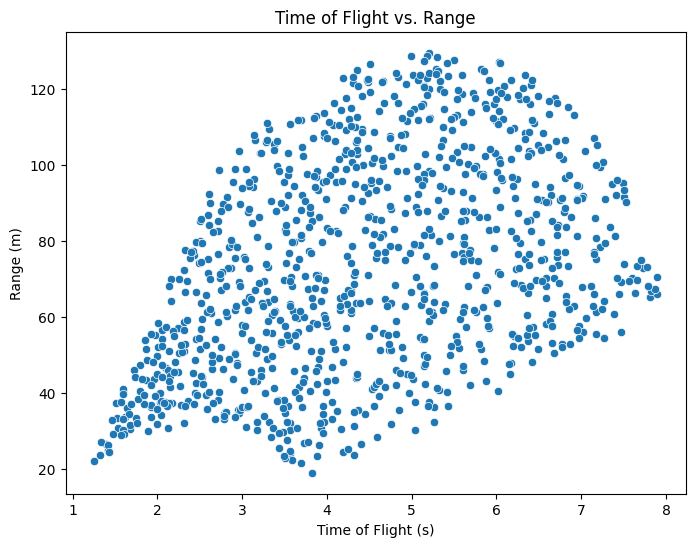

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Initial_Velocity', y='Range', data=df)
plt.title('Initial Velocity vs. Range')
plt.xlabel('Initial Velocity (m/s)')
plt.ylabel('Range (m)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Launch_Angle', y='Max_Height', data=df)
plt.title('Launch Angle vs. Max Height')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Max Height (m)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time_of_Flight', y='Range', data=df)
plt.title('Time of Flight vs. Range')
plt.xlabel('Time of Flight (s)')
plt.ylabel('Range (m)')
plt.show()


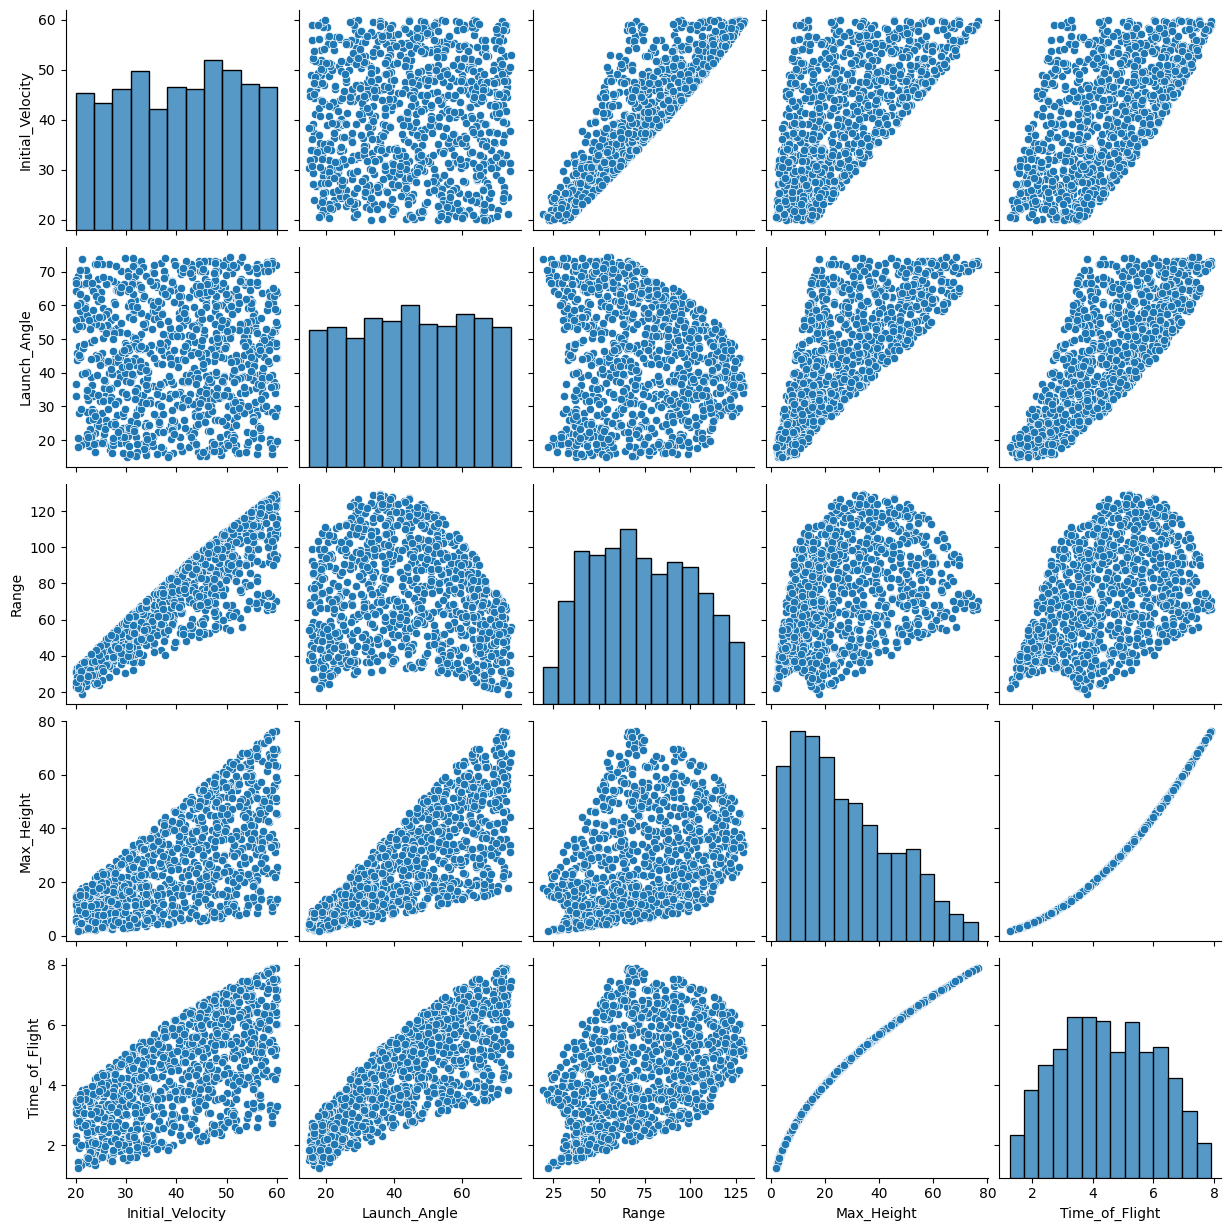

In [ ]:
sns.pairplot(df[['Initial_Velocity', 'Launch_Angle', 'Range', 'Max_Height', 'Time_of_Flight']])
plt.show()


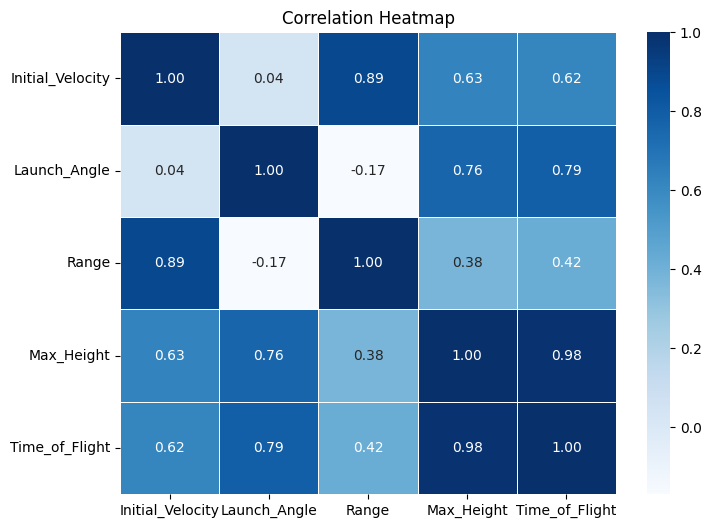

In [ ]:
import seaborn as sns

corr_matrix = df[['Initial_Velocity', 'Launch_Angle', 'Range', 'Max_Height', 'Time_of_Flight']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/synthetic_projectile_data.csv')

variance = df[['Range', 'Max_Height', 'Time_of_Flight']].var()

print(variance)


Range             752.827833
Max_Height        324.000276
Time_of_Flight      2.518494
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

features = ['Initial_Velocity', 'Launch_Angle', 'Wind_Speed', 'Wind_Angle']
targets = ['Range', 'Max_Height', 'Time_of_Flight']

X = df_clean[features]
y = df_clean[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("-" * 50)
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Target", "RMSE", "Mean", "Std Dev", "RMSE (%)"))
print("-" * 50)

for target in targets:
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred[:, targets.index(target)]))
    mean = y_test[target].mean()
    std = y_test[target].std()
    rmse_percentage = (rmse / mean) * 100

    print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(target, rmse, mean, std, rmse_percentage))

print("-" * 50)

--------------------------------------------------
Target               RMSE       Mean       Std Dev    RMSE (%)  
--------------------------------------------------
Range                1.49       74.77      27.55      1.99      
Max_Height           0.65       29.37      17.53      2.21      
Time_of_Flight       0.06       4.64       1.52       1.34      
--------------------------------------------------


In [ ]:
import joblib

joblib.dump(model, 'projectile_motion_model.pkl')

['projectile_motion_model.pkl']